<img src="30S.png" width="50%" alt="Image of 30S ribosomal subunit" style="float:right"/>

# Ribosomal Database Project

The Ribosomal Database Project (RDP) is a bioinformatics project that aims to provide a comprehensive database of ribosomal RNA (rRNA) sequences and related data for use in phylogenetic analysis and microbial ecology research. The project was initiated in 1984 by Carl Woese, a pioneer in the field of molecular evolution, and is currently maintained by a team of researchers at Michigan State University.

The RDP contains a curated database of rRNA sequences from bacteria, archaea, and eukaryotes. The database includes both 16S and 18S rRNA sequences, which are commonly used as molecular markers for bacterial and eukaryotic phylogenetic analysis, respectively. 

In this workshop, we'll use a curated file of approximately 15000 16S rDNA sequences.


# Retrieving your Sequences

The 16S sequences obtained by Nanopore sequencing have been provided in a csv file called `16S_sequences_23.csv`.

Samples were identified by using extra sequences known as 'barcodes' that were added to the PCR primers. Each sample was tagged with a unique combination from 12 forward and 8 reverse primer sequences, as shown in the picture below.

Identify your sample's forward and reverse primers from the image below:

<img src="dna_samples_w5_23.png" width="85%" alt="DNA samples"/>

# Workshop tasks

Today's workshop is divided into 5 sections:
* Retrieving your 16S sequences
* Loading the reference 16S sequence database
* Searching for database matches
* Visualising your analysis results
* Evaluation and Reflection on Results

### Retrieving your 16S sequences

1. Load the file 'Discovery_23_16S_consensus.csv' into memory. Explore the dataframe. Retrieve your 16S sequences from the Pandas dataframe using the `.query()` function by looking for rows that match your combination of forward and reverse primers. If there is no match for your group's 2 pairs of forward and reverse primers, run the code below and look for a combination of forward and reverse primers that does have reads, and select one you like the look of for further analysis in this workshop. 
```python 
#load the dataframe
df=pd.read_csv("Discovery_23_16S_consensus.csv")
# Create a contingency table of the forward and reverse indices
ct = pd.crosstab(df['reverse_primer'], df['forward_primer'])
print(ct)
```

2. Extract your 16S sequences to a list using `.tolist()`. From the list, try extracting individual sequences using indexing (for example mylist[0] or mylist [1]).


In [5]:
import pandas as pd
#load the dataframe
df=pd.read_csv("Discovery_23_16S_consensus.csv")
# Create a contingency table of the forward and reverse indices
ct = pd.crosstab(df['reverse_primer'], df['forward_primer'])
print(ct)
display(df)

forward_primer  0   1   2   3   4   5   6   7   8   9   10  11
reverse_primer                                                
0                6   0   4   0   0   6   1   5  16   9   0   7
1                4   1   0   0  10  11   6   6   4  25   7   6
2                6   7  21   3  14   6  12   0   0   8   3   0
3               11   2   0   4   3   4  17   4  10   2   4   4
4                4   9   2   0   0   0   5   0   2   3  20   2
5                0  12   3   0  11   8   4   0   4   7   0  13
6               37   0   0   0   0   0   0   0   0   0   0   0


,forward_primer,reverse_primer,descriptor,sequence
0,0,0,40,TCAGTTACGTATTGCTGATCGAGTAGCGAGGGTTCGATCATGGCTC...
1,0,0,60,GGGTTGGCTGTATTGCTGATCGAGTAGCGAGGGTTTGATTATGGCT...
2,0,0,72,ATGTACTTCGTCAGTTACGTGGTGATCGAGTAGCGAGGGTTTGATC...
3,0,0,90,AGTTACGTATTGCTGATCGAGTAGCGAGGGTTTGATTCTGGCTCAG...
4,0,0,167,GTTACGTATTGCTGATCGAGTAGCGAGGGTTTGATTATGGCTCAGG...
...,...,...,...,...
420,11,5,415,GTATGCTTCGTTCAGTTGCGTATTGCTGATCGTGAGCATAGGGTTC...
421,11,5,471,GTATTGCTTCGTTCAGTTACGTATTGCTGATCGTGAGCATAAGGTT...
422,11,5,514,GTTACGTATTGCCGATCGTGAGCATAGAGTTTTGATTATGGCTCAG...
423,11,5,577,GTTACGTATTGCTGATCGTGAGCATAGGGTTCGATTATGGCTCAGG...


In [6]:
class_seqs=pd.read_csv("Discovery_23_16S_consensus.csv")
my_seqs=class_seqs.query('forward_primer==0 & reverse_primer==6')
display(my_seqs)


,forward_primer,reverse_primer,descriptor,sequence
31,0,6,0,AGTTACGTATTGCTGATCGAGTAGCGAGGGTTTGATCATGGCTCAG...
32,0,6,2,TGTACTTCGTTCAGTTACGTATTGCTGATCGAGTAGCGGGGTTCGA...
33,0,6,3,ATTGTACTTCGTTCAGTTACGTATTGCTGATCGAGTAGCGAGGGTT...
34,0,6,4,CTGCCACGTATTGCTGATCGAGTAGCGAGAGTTTGATTATGGCTCA...
35,0,6,5,ATTGTACTTCGTTCAATTACGTATTGTGATCGAGTAGCGAGGTTTG...
36,0,6,6,GTATGCTTCGTTCGGTTACGTATTGCTGATCGAGTAGCGAGGGTTT...
37,0,6,8,TGTACTTCGTTCAGTTGCAGCCATTGCTGATCGAGTAGCGAGAGTT...
38,0,6,9,ATGTACTTCGTTCAGTTACGTATTGCTGATCGAGTAGCGAGGGTTT...
39,0,6,10,ATTGTGCTTCGTTCAGTTACGTATTGCTGATCGAGTAGCGAGGTTC...
40,0,6,12,GTGTTGTACTTCCGTTCAGTTACGTATTGCTGATCGAGTAGCGAGT...


In [7]:
my_sequence=my_seqs['sequence'].tolist()
print(my_sequence)

['AGTTACGTATTGCTGATCGAGTAGCGAGGGTTTGATCATGGCTCAGGATGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAGCGAACTGATTAGAAGCTTGCTTCTGCGAATGTTAGCGGCGGACGGTGAGTAACACGTGGGCAACCTTGCCTGTAAGACTGGGATAACTTCGGAAACCGAAAGCTAATACCGGATAGGATCTTCTCCTTCATGGGAGATGATTGAAAGATGGTTTCGGCTATCACTTACAGATGGGCCCGCGGTGCATTAGCTAGTTGGTGAGGTAACGGCTCACCAAGGCAACGATGCATAGCTTTAATTTGAGAGGTGATCGGCCACACTGGGACTGGTGACACGGCCCAGATCACGGGAGGCAGCAGTAGGGAATTCGCAATGGACGTGAAAGTCTGACGGAGCAACGCCGCGAGTGATGAAGGCTTTCGGGTCGTAAAACTCTCGCTAGGGAAGAACAAGTACAAGAGTAACTGCTTGTACCTTGACGGTACCTAACCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAGCGTTATCCGGAATTATTGGGCGTAAAAGCGCGCGCAGGCGGTTTCTTAAGTCTGATGGTTTCACGGCTCAACCGTGGAGGGTCATTGGAAACTGGGGAACTTGAGGCAGAAGAGAAAAGCGGAATTCCACGTGTAGCGGTGAAATGCGTAGAGATGTGGAGGAACACCAGTGGCGAAGGCGGCTTTCTTTTGGTCTGTAACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAGTGCTGGCGGTTAGAGGGTTTCCGCCCCTTAGTGCTGCAGCTAACGCATTAAGCACTCCGCCTGGGAGTACGGTCGCAAGACTGAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGA

### Loading the reference 16S sequence database

3. Load the 16S_reference.csv database into a pandas dataframe (use a different name to that you used when loading your sequences). This is a large version of the 'mini' dataframe you used last week. How many sequences are in the database?




In [8]:
references=pd.read_csv('16S_reference.csv')
references.head()
references.shape
references

,id,sequence,species
0,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGGAAAGGTC...,Mycobacterium_heidelbergense(AJ000684)
1,Bacteria;Proteobacteria;Gammaproteobacteria;Vi...,GTTTGATCCTGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACAT...,Vibrio_atlanticus(EF599163)
2,Bacteria;Actinobacteria;Actinobacteria;Actinom...,TAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAAC...,Mycobacterium_aubagnense(AY859683)
3,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,AAGAGTTTGATCCTGGCTCAGAGCGAACGCTGGCGGCATGCTTAAC...,Acetobacter_senegalensis(AY883036)
4,Bacteria;Proteobacteria;Betaproteobacteria;Bur...,ATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGTAAC...,Aquincola_tertiaricarbonis(DQ656489)
...,...,...,...
15150,Bacteria;Actinobacteria;Actinobacteria;Actinom...,AGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAACACA...,Leucobacter_komagatae(NR_112021.1)
15151,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GATGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAGCGGTAAG...,Thermobifida_fusca(NR_112015.1)
15152,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAGCGGTAAA...,Microbispora_mesophila(NR_112014.1)
15153,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAGCGGAAAA...,Parvopolyspora_pallida(NR_112013.1)



### Searching for database matches

4. For each sequence, create a new column in the Pandas dataframe that represents the Levenshtein distance between that sequence and the sequences in the dataframe. The code you developed at the end of the week 7 workshop is close to what you will need to use here. Make sure that you create a different column name for the distance to each sequence, for example 'dist_to_seq_1', 'dist_to_seq_2', etc. You can do this by running modified code for each of your group's sequences in turn (or each person can analyse a different one). If you're feeling comfortable and advanced, you could use a loop to process all sequences in your list of your group's sequences.
5. Identify the best match(es) for each sequence: how close is the match? 


In [9]:
!pip install levenshtein
#pip is a package manager:this command installs the levenshtein package on our Noteable instance.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 47.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: rapidfuzz
    Found existing installation: rapidfuzz 3.2.0
    Uninstalling rapidfuzz-3.2.0:
      Successfully uninstalled rapidfuzz-3.2.0


In [11]:
from Levenshtein import distance

seq1=my_sequence[0]
print(seq1)

AGTTACGTATTGCTGATCGAGTAGCGAGGGTTTGATCATGGCTCAGGATGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAGCGAACTGATTAGAAGCTTGCTTCTGCGAATGTTAGCGGCGGACGGTGAGTAACACGTGGGCAACCTTGCCTGTAAGACTGGGATAACTTCGGAAACCGAAAGCTAATACCGGATAGGATCTTCTCCTTCATGGGAGATGATTGAAAGATGGTTTCGGCTATCACTTACAGATGGGCCCGCGGTGCATTAGCTAGTTGGTGAGGTAACGGCTCACCAAGGCAACGATGCATAGCTTTAATTTGAGAGGTGATCGGCCACACTGGGACTGGTGACACGGCCCAGATCACGGGAGGCAGCAGTAGGGAATTCGCAATGGACGTGAAAGTCTGACGGAGCAACGCCGCGAGTGATGAAGGCTTTCGGGTCGTAAAACTCTCGCTAGGGAAGAACAAGTACAAGAGTAACTGCTTGTACCTTGACGGTACCTAACCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAGCGTTATCCGGAATTATTGGGCGTAAAAGCGCGCGCAGGCGGTTTCTTAAGTCTGATGGTTTCACGGCTCAACCGTGGAGGGTCATTGGAAACTGGGGAACTTGAGGCAGAAGAGAAAAGCGGAATTCCACGTGTAGCGGTGAAATGCGTAGAGATGTGGAGGAACACCAGTGGCGAAGGCGGCTTTCTTTTGGTCTGTAACTGACGCTGAGGCGCGAAAGCGTGGGGAGCAAAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAGTGCTGGCGGTTAGAGGGTTTCCGCCCCTTAGTGCTGCAGCTAACGCATTAAGCACTCCGCCTGGGAGTACGGTCGCAAGACTGAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAAC

In [12]:
print(references['dist1'])

KeyError: 'dist1'

In [8]:
display(references)

,id,sequence,species
0,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGGAAAGGTC...,Mycobacterium_heidelbergense(AJ000684)
1,Bacteria;Proteobacteria;Gammaproteobacteria;Vi...,GTTTGATCCTGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACAT...,Vibrio_atlanticus(EF599163)
2,Bacteria;Actinobacteria;Actinobacteria;Actinom...,TAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAAC...,Mycobacterium_aubagnense(AY859683)
3,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,AAGAGTTTGATCCTGGCTCAGAGCGAACGCTGGCGGCATGCTTAAC...,Acetobacter_senegalensis(AY883036)
4,Bacteria;Proteobacteria;Betaproteobacteria;Bur...,ATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGTAAC...,Aquincola_tertiaricarbonis(DQ656489)
...,...,...,...
15150,Bacteria;Actinobacteria;Actinobacteria;Actinom...,AGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAACACA...,Leucobacter_komagatae(NR_112021.1)
15151,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GATGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAGCGGTAAG...,Thermobifida_fusca(NR_112015.1)
15152,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAGCGGTAAA...,Microbispora_mesophila(NR_112014.1)
15153,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAGCGGAAAA...,Parvopolyspora_pallida(NR_112013.1)


In [9]:
references['dist2']=references['sequence'].apply(distance, args=(seq1,))
display(references)

,id,sequence,species,dist2
0,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGGAAAGGTC...,Mycobacterium_heidelbergense(AJ000684),474
1,Bacteria;Proteobacteria;Gammaproteobacteria;Vi...,GTTTGATCCTGGCTCAGATTGAACGCTGGCGGCAGGCCTAACACAT...,Vibrio_atlanticus(EF599163),481
2,Bacteria;Actinobacteria;Actinobacteria;Actinom...,TAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAAC...,Mycobacterium_aubagnense(AY859683),454
3,Bacteria;Proteobacteria;Alphaproteobacteria;Rh...,AAGAGTTTGATCCTGGCTCAGAGCGAACGCTGGCGGCATGCTTAAC...,Acetobacter_senegalensis(AY883036),518
4,Bacteria;Proteobacteria;Betaproteobacteria;Bur...,ATTGAACGCTGGCGGCATGCCTTACACATGCAAGTCGAACGGTAAC...,Aquincola_tertiaricarbonis(DQ656489),499
...,...,...,...,...
15150,Bacteria;Actinobacteria;Actinobacteria;Actinom...,AGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCTTAACACA...,Leucobacter_komagatae(NR_112021.1),449
15151,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GATGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAGCGGTAAG...,Thermobifida_fusca(NR_112015.1),481
15152,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAGCGGTAAA...,Microbispora_mesophila(NR_112014.1),466
15153,Bacteria;Actinobacteria;Actinobacteria;Actinom...,GACGAACGCTGGCGGCGTGCTTAACACATGCAAGTCGAGCGGAAAA...,Parvopolyspora_pallida(NR_112013.1),466


In [10]:
print(references['dist2'].min())

231


In [11]:
display(references[references.dist2 == 231])

,id,sequence,species,dist2
442,Bacteria;Firmicutes;Bacilli;Bacillales;Bacilla...,TTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAATACATG...,Bacillus_subtilis(HE582781),231


In [8]:
min(references.dist1)

180

In [9]:
refn = references[references.dist1 != 231]
min(refn.dist1)

180

In [10]:
references.query('dist1==180')['species'].iloc[0]
seq_ref=references.query('dist1==180')['sequence'].iloc[0]
seq_ref

'CTATCGGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAATACATGCAAGTCGAGCGGACAGATGGGAGCTTGCTCCCTGATGTTAGCGGCGGACGGGTGAGTAACACGTGGGTAACCTGCCTGTAAGACTGGGATAACTCCGGGAAACCGGGGCTAATACCGGATGCTTGTTTGAACCGCATGGTTCAAACATAAAAGGTGGCTTCGGCTACCACTTACAGATGGACCCGCGGCGCATTAGCTAGTTGGTGAGGTAACGGCTCACCAAGGCGACGATGCGTAGCCGACCTGAGAGGGTGATCGGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTAGGGAATCTTCCGCAATGGACGAAAGTCTGACGGAGCAACGCCGCGTGAGTGATGAAGGTTTTCGGATCGTAAAGCTCTGTTGTTAGGGAAGAACAAGTGCCGTTCAAATAGGGCGGCACCTTGACGGTACCTAACCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGGGCTCGCAGGCGGTTTCTTAAGTCTGATGTGAAAGCCcccGGCTCAACCGGGGAGGGTCATTGGAAACTGGGGAACTTGAGTGCAGAAGAGGAGAGTGGAATTCCACGTGTAGCGGTGAAATGCGTAGAGATGTGGAGGAACACCAGTGGCGAAGGCGACTctctGGTCTGTAACTGACGCTGAGGAGCGAAAGCGTGGGGAGCGAACAGGATTAGATACCCTGGTAGTCCACGCCGTAAACGATGAGTGCTAAGTGTTAGGgggTTTCCGCCCCTTAGTGCTGCAGCTAACGCATTAAGCACTCCGCCTGGGGAGTACGGTCGCAAGACTGAAACTCAAAGGAATTGACGGgggCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCAACGCGAAGAACCTTACCAGGTCT

In [11]:
import needleman_wunsch
print(needleman_wunsch.align(seq1,seq_ref))

seq1: TTACGTATTGTTGATCCGCGATGTAGAGTTTGATTATGGCTCAGGACGAACGCT-GCGGCGTGCCTAATA
         |       | ||   ||  | ||||||||||  |||||||||||||||||| |||||||||||||||
seq2: ---C-------T-AT---CG--G-AGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAATA

seq1: CATGCAAGTCGAGCGGAC--A--GGAGCTTGCTCCCTGATGTTAGCGGCGGACGGGTGAGTAACAC--GG
      ||||||||||||||||||  |  |||||||||||||||||||||||||||||||||||||||||||  ||
seq2: CATGCAAGTCGAGCGGACAGATGGGAGCTTGCTCCCTGATGTTAGCGGCGGACGGGTGAGTAACACGTGG

seq1: GTAACCTGCCTGTAAGACTGGGATAACTCC-GGAAACCGGGGCTAATACTGGATGGTTGTTTGAACCGCA
      |||||||||||||||||||||||||||||| |||||||||||||||||| ||||| ||||||||||||||
seq2: GTAACCTGCCTGTAAGACTGGGATAACTCCGGGAAACCGGGGCTAATACCGGATGCTTGTTTGAACCGCA

seq1: TGGTTCAAACATAAAAGGTGGCTTTGGCTACCACTTACAGATGGACCCGCGGCGCATTAGCTAGTTGGTG
      |||||||||||||||||||||||| |||||||||||||||||||||||||||||||||||||||||||||
seq2: TGGTTCAAACATAAAAGGTGGCTTCGGCTACCACTTACAGATGGACCCGCGGCGCATTAGCTAGTTGGTG

seq1: AGGTAACGGCTCACCAAGGCAACGA----T-GCCGACCTGAGAGGGTGATCGG-C-CATTGGGACT

### Visualising your analysis results

6. Run a needleman_wunsch alignment between your 16S sequence(s) and the best match. How much of the sequence is aligned? Can you see poorer alignment at the ends of the sequence caused by the presence of PCR primers in your sequence?

An example code for running a Needleman-Wunsch alignment is shown below:

```python
import needleman_wunsch
seq1='ATGCTGAGCTAGCGGCTATATTCTATCGGGAGCGATTTACTACTC'
seq2='ATGCTAGGTAGCGGACTATATACTATCGCGAGCGATTAACTAGCC'
print(needleman_wunsch.align(seq1, seq2))
```
Expected output:
```
seq1: ATGCTGAGCTAGCGG-CTATATTCTATCGGGAGCGATTTACTA-CTC
      ||||| || |||||| |||||| |||||| |||||||| |||| | |
seq2: ATGCT-AGGTAGCGGACTATATACTATCGCGAGCGATTAACTAGC-C
```



### Evaluation and Reflection on Results

7. Draw a histogram of the sequence distances between your group's 16S sequence(s) and each of the sequences in the database. What is the species that has the most distant sequence in the database for your 16S sequence? Does that make sense when put into the context of the tree of life?
8. Is the species you've identified known to produce antimicrobial compounds? 
9. Do you think that the species classification has been accurately predicted? What factors could affect the accuracy of your sequencing hit?


<AxesSubplot:xlabel='dist1', ylabel='Count'>

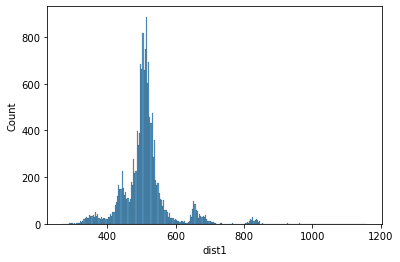

In [26]:
import seaborn as sns

sns.histplot(references['dist1'])
